# Medical Billing Data Analysis Dashboard

This notebook explores a synthetic medical billing dataset using SQL and Python.
We analyze claim denials, reimbursement delays, and provider performance.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import seaborn as sns


conn = psycopg2.connect(
    host='localhost',
    database='rcm_dashboard',
    user='postgres',
    password='hisoka123'
)


## Load claims data

In [2]:
claims_df = pd.read_sql("SELECT * FROM claims", conn)
claims_df['claim_date'] = pd.to_datetime(claims_df['claim_date'])
claims_df['reimbursement_date'] = pd.to_datetime(claims_df['reimbursement_date'])
claims_df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_3592\430001032.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  claims_df = pd.read_sql("SELECT * FROM claims", conn)


,claim_id,patient_id,procedure_code,provider_id,claim_date,amount,status,reimbursement_date
0,C0001,P024,CPT007,PR04,2023-05-11,943,Approved,2023-06-25
1,C0002,P026,CPT014,PR10,2023-10-20,961,Approved,2023-11-01
2,C0003,P089,CPT005,PR02,2023-06-20,1484,Approved,2023-06-26
3,C0004,P060,CPT012,PR08,2023-07-02,1380,Approved,2023-08-23
4,C0005,P041,CPT001,PR06,2023-12-30,232,Approved,2024-01-21


## 1. Count of Claims by Status

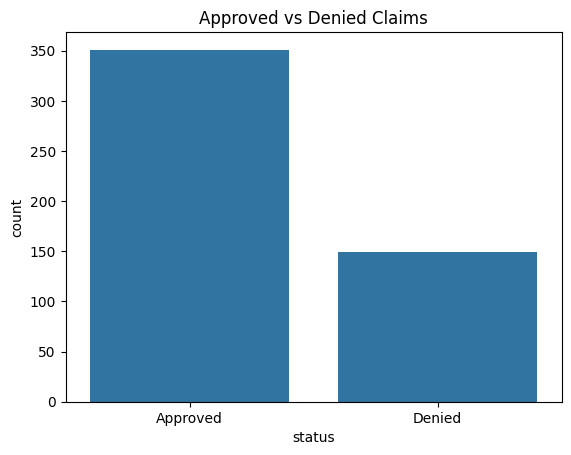

In [3]:
sns.countplot(data=claims_df, x='status')
plt.title('Approved vs Denied Claims')
plt.show()

## 2. Reimbursement Delay Analysis

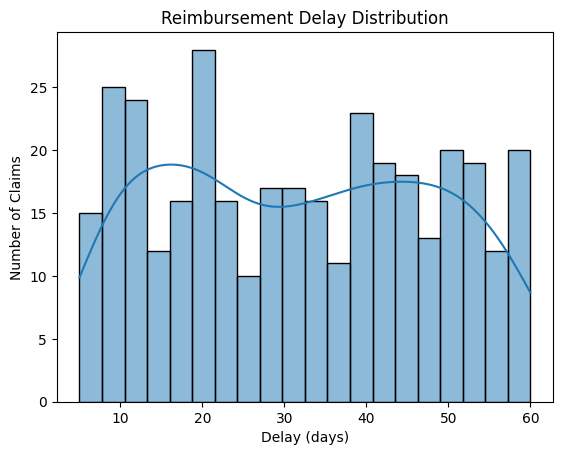

In [4]:
approved_claims = claims_df[claims_df['status'] == 'Approved'].copy()
approved_claims['delay_days'] = (approved_claims['reimbursement_date'] - approved_claims['claim_date']).dt.days

sns.histplot(approved_claims['delay_days'], bins=20, kde=True)
plt.title('Reimbursement Delay Distribution')
plt.xlabel('Delay (days)')
plt.ylabel('Number of Claims')
plt.show()

## 3. Denials by Reason Code

C:\Users\HP\AppData\Local\Temp\ipykernel_3592\732759187.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  denials_df = pd.read_sql("SELECT * FROM denials", conn)


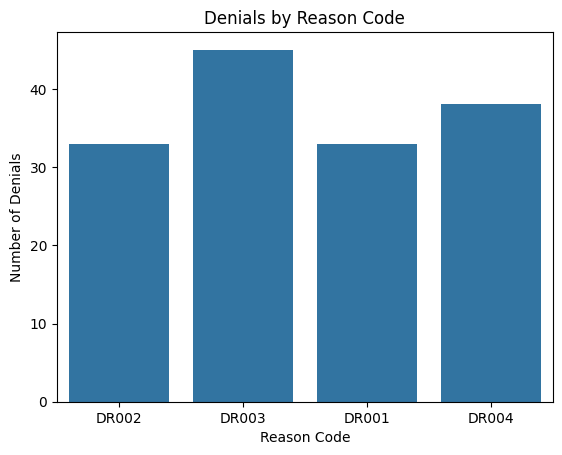

In [5]:
denials_df = pd.read_sql("SELECT * FROM denials", conn)
sns.countplot(data=denials_df, x='reason_code')
plt.title('Denials by Reason Code')
plt.xlabel('Reason Code')
plt.ylabel('Number of Denials')
plt.show()

## 4. Denied Claims by Provider

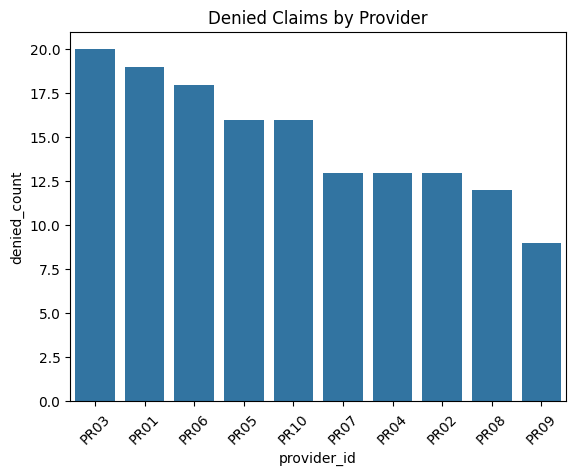

In [6]:
denied_claims = claims_df[claims_df['status'] == 'Denied']
denied_by_provider = denied_claims['provider_id'].value_counts().reset_index()
denied_by_provider.columns = ['provider_id', 'denied_count']

sns.barplot(data=denied_by_provider, x='provider_id', y='denied_count')
plt.title('Denied Claims by Provider')
plt.xticks(rotation=45)
plt.show()